# 4 - Analysis

After extracting all necessary data, let's try to make sense of it.

In [110]:
import os
import pandas as pd
import datetime as dt
import tqdm

from matplotlib import rcParams, rcParamsDefault, pyplot as plt
import seaborn as sns

rcParams.update(rcParamsDefault)
rcParams['figure.figsize'] = (14, 10)
rcParams['figure.dpi'] = 100

sns.set_theme()

## 4.1 - Importing the processed data

In [178]:
path = r'../data/processed'

pop_fn = r'brazil_population_state_annually.parquet'
pop_abspath = os.path.abspath(os.path.join(path, pop_fn))
popdf = pd.read_parquet(pop_abspath)

natality_fn = r'brazil_natality_state_monthly_difpct12m.parquet'
natality_abspath = os.path.abspath(os.path.join(path, natality_fn))
nat_abs_df = pd.read_parquet(natality_abspath)

jabs_unique_fn = r'brazil_covidjabs_state_monthly.parquet'
jabs_unique_abspath = os.path.abspath(os.path.join(path, jabs_unique_fn))
jabs_unique_df = pd.read_parquet(jabs_unique_abspath)

jabs_fn = r'brazil_covidjabs_state_monthly_ntotal.parquet'
jabs_abspath = os.path.abspath(os.path.join(path, jabs_fn))
jabsdf = pd.read_parquet(jabs_abspath)

jabs_npatients_fn = r'brazil_covidjabs_state_monthly_patienttotal.parquet'
jabs_npatients_abspath = os.path.abspath(os.path.join(path, jabs_npatients_fn))
jabs_npatients_df = pd.read_parquet(jabs_npatients_abspath)

In [179]:
#popdf['year'] = popdf['year'].apply(lambda y: dt.datetime.strptime(str(y), '%Y'))
popdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        216 non-null    int64 
 1   state       216 non-null    object
 2   population  216 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.3+ KB


In [180]:
popdf.tail(10)

,year,state,population
206,2022,Piauí,3270174
207,2022,Rio Grande do Norte,3303953
208,2022,Rio Grande do Sul,11088065
209,2022,Rio de Janeiro,16615526
210,2022,Rondônia,1616379
211,2022,Roraima,634805
212,2022,Santa Catarina,7762154
213,2022,Sergipe,2211868
214,2022,São Paulo,46024937
215,2022,Tocantins,1584306


In [181]:
natdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 1647 to 2618
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      972 non-null    datetime64[ns]
 1   state                      972 non-null    category      
 2   registered_births          972 non-null    int32         
 3   year                       972 non-null    int64         
 4   month_name                 972 non-null    category      
 5   registered_births_dif_12m  972 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 37.7 KB


In [182]:
natdf.tail(10)

,month,state,registered_births,year,month_name,registered_births_dif_12m
2609,2023-01-01,Piauí,1449,2023,Jan,-0.615037
2610,2023-01-01,Rio Grande do Norte,2253,2023,Jan,-0.302908
2611,2023-01-01,Rio Grande do Sul,7473,2023,Jan,-0.264179
2612,2023-01-01,Rio de Janeiro,11013,2023,Jan,-0.305393
2613,2023-01-01,Rondônia,1296,2023,Jan,-0.387813
2614,2023-01-01,Roraima,612,2023,Jan,-0.449145
2615,2023-01-01,Santa Catarina,6164,2023,Jan,-0.276526
2616,2023-01-01,Sergipe,1821,2023,Jan,-0.333699
2617,2023-01-01,São Paulo,31292,2023,Jan,-0.298071
2618,2023-01-01,Tocantins,1245,2023,Jan,-0.365443


In [144]:
jabsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   vacina_dataAplicacao  724 non-null    datetime64[ns, UTC]
 1   estabelecimento_uf    724 non-null    object             
 2   total_jabs            724 non-null    int64              
 3   mrna_jabs             724 non-null    int64              
 4   total_jabs_cum        724 non-null    int64              
 5   mrna_jabs_cum         724 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 34.1+ KB


In [145]:
jabsdf.tail(10)

,vacina_dataAplicacao,estabelecimento_uf,total_jabs,mrna_jabs,total_jabs_cum,mrna_jabs_cum
714,2023-02-28 00:00:00+00:00,ES,275,132,1198208,553408
715,2023-02-28 00:00:00+00:00,CE,661,456,1198869,553864
716,2023-02-28 00:00:00+00:00,BA,1199,942,1200068,554806
717,2023-02-28 00:00:00+00:00,AP,57,45,1200125,554851
718,2023-02-28 00:00:00+00:00,AM,140,61,1200265,554912
719,2023-02-28 00:00:00+00:00,AL,206,141,1200471,555053
720,2023-02-28 00:00:00+00:00,AC,18,7,1200489,555060
721,2023-02-28 00:00:00+00:00,SP,6332,5107,1206821,560167
722,2023-02-28 00:00:00+00:00,MT,189,99,1207010,560266
723,2023-02-28 00:00:00+00:00,TO,94,70,1207104,560336


In [153]:
jabs_npatients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   vacina_dataAplicacao  724 non-null    datetime64[ns, UTC]
 1   estabelecimento_uf    724 non-null    object             
 2   total_jabbed_monthly  724 non-null    int64              
 3   mrna_jabbed_monthly   724 non-null    int64              
 4   total_jabbed          724 non-null    int64              
 5   mrna_jabbed           724 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 34.1+ KB


In [154]:
jabs_npatients_df.tail(10)

,vacina_dataAplicacao,estabelecimento_uf,total_jabbed_monthly,mrna_jabbed_monthly,total_jabbed,mrna_jabbed
714,2023-02-28 00:00:00+00:00,PR,959,652,44718,21057
715,2023-02-28 00:00:00+00:00,RJ,826,610,56122,36900
716,2023-02-28 00:00:00+00:00,RN,66,47,16935,9801
717,2023-02-28 00:00:00+00:00,RO,132,124,3564,3246
718,2023-02-28 00:00:00+00:00,RR,74,61,2371,1623
719,2023-02-28 00:00:00+00:00,RS,692,628,33960,25009
720,2023-02-28 00:00:00+00:00,SC,352,230,23015,11844
721,2023-02-28 00:00:00+00:00,SE,271,208,11068,7666
722,2023-02-28 00:00:00+00:00,SP,6332,5107,604151,220164
723,2023-02-28 00:00:00+00:00,TO,94,70,3213,2008


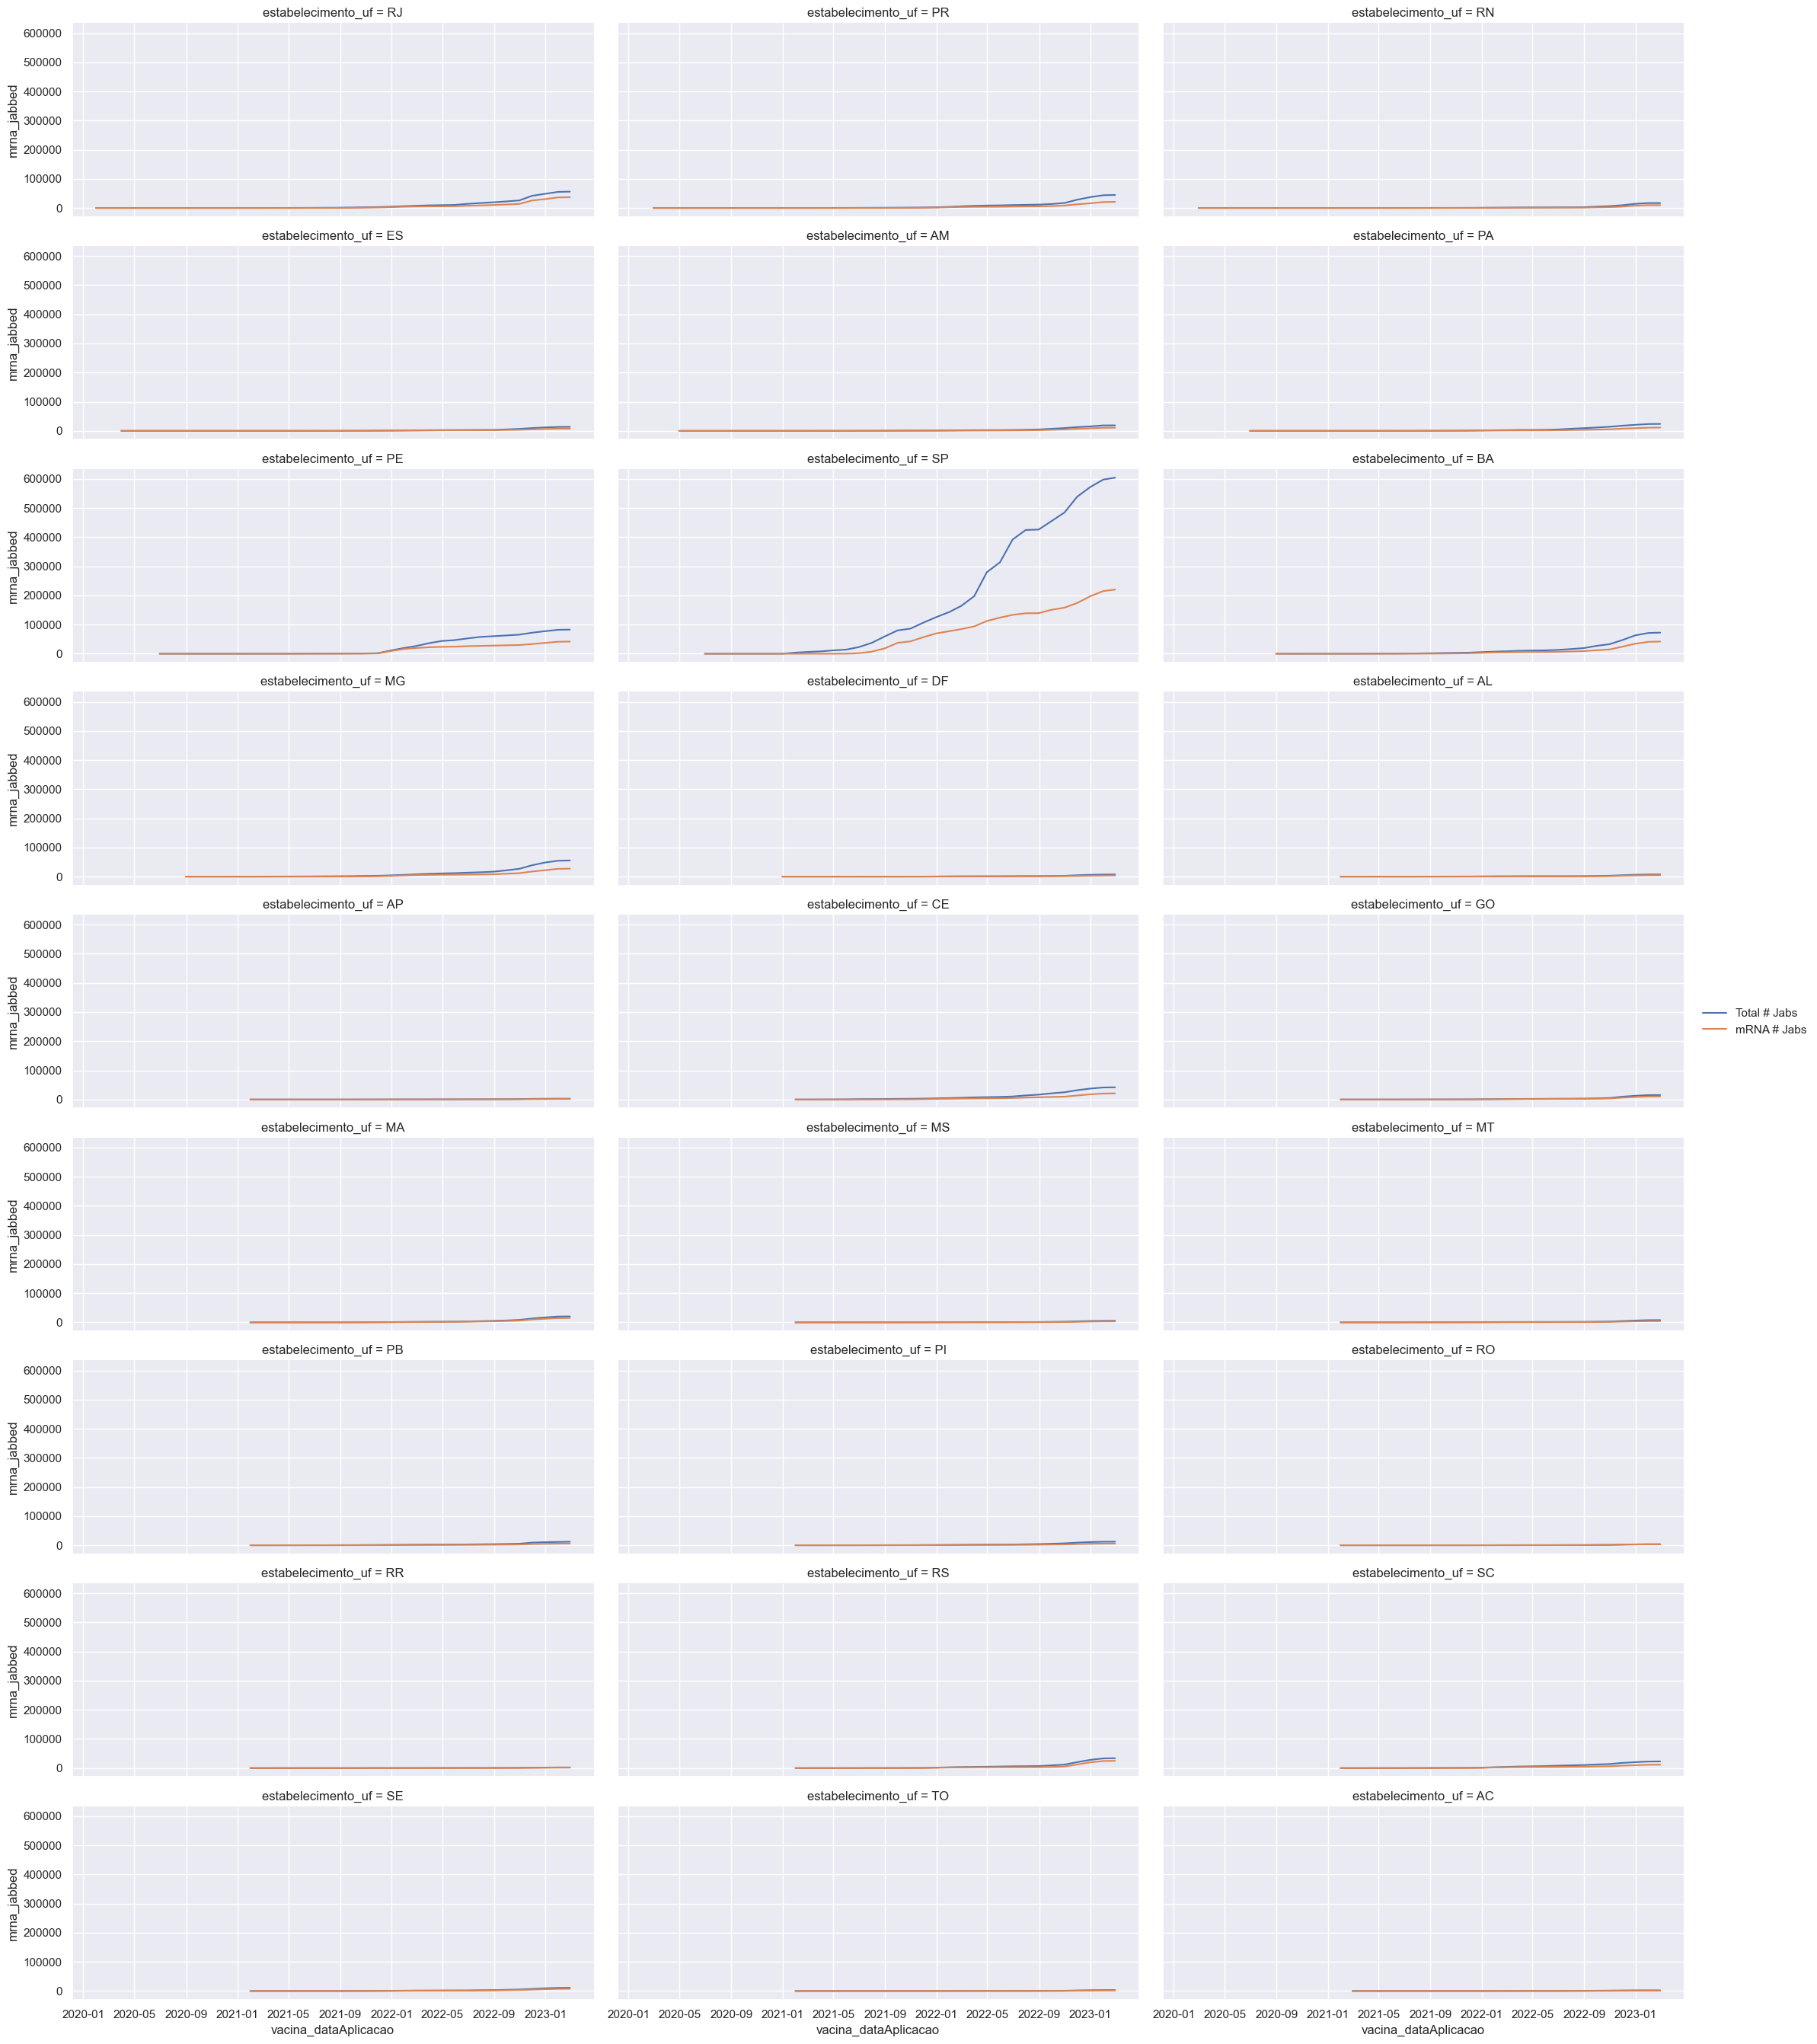

In [160]:
# quick graph showing jabs applied across time
facetgrid = sns.FacetGrid(
    data = jabs_npatients_df, 
    col = 'estabelecimento_uf', 
    col_wrap = 3, aspect = 2.5
)

facetgrid.map_dataframe(sns.lineplot, 
    x = 'vacina_dataAplicacao', y = 'total_jabbed',
    label = 'Total # Jabs'
)

facetgrid.map_dataframe(sns.lineplot, 
    x = 'vacina_dataAplicacao', y = 'mrna_jabbed',
    color = sns.color_palette()[1],
    label = 'mRNA # Jabs'
)

facetgrid.add_legend()
plt.show()

## 4.3 - Merging DFs

In [204]:
popdf

,year,state,population
0,2015,Acre,803513
1,2015,Alagoas,3340932
2,2015,Amapá,766679
3,2015,Amazonas,3938336
4,2015,Bahia,15203934
...,...,...,...
211,2022,Roraima,634805
212,2022,Santa Catarina,7762154
213,2022,Sergipe,2211868
214,2022,São Paulo,46024937


In [203]:
jabsdf.estabelecimento_uf.unique()

array(['RJ', 'PR', 'RN', 'ES', 'AM', 'PA', 'PE', 'SP', 'BA', 'MG', 'DF',
       'PI', 'RR', 'SC', 'SE', 'TO', 'RS', 'PB', 'RO', 'MT', 'AP', 'CE',
       'AL', 'MS', 'GO', 'MA', 'AC'], dtype=object)

In [201]:
jabs_npatients_df

,vacina_dataAplicacao,estabelecimento_uf,total_jabbed_monthly,mrna_jabbed_monthly,total_jabbed,mrna_jabbed
0,2020-01-31 00:00:00+00:00,RJ,1,0,1,0
1,2020-02-29 00:00:00+00:00,PR,1,0,1,0
2,2020-02-29 00:00:00+00:00,RN,1,1,1,1
3,2020-03-31 00:00:00+00:00,ES,1,0,1,0
4,2020-04-30 00:00:00+00:00,AM,1,0,1,0
...,...,...,...,...,...,...
719,2023-02-28 00:00:00+00:00,RS,692,628,33960,25009
720,2023-02-28 00:00:00+00:00,SC,352,230,23015,11844
721,2023-02-28 00:00:00+00:00,SE,271,208,11068,7666
722,2023-02-28 00:00:00+00:00,SP,6332,5107,604151,220164


In [205]:
states_abbr = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Paraná': 'PR',
    'Paraíba': 'PB',
    'Pará': 'PA',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rio de Janeiro': 'RJ',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sergipe': 'SE',
    'São Paulo': 'SP',
    'Tocantins': 'TO'
}

jabs_npatients_pop_df = jabs_npatients_df.merge(right = popdf,
    left_on = [
        jabs_npatients_df['vacina_dataAplicacao'].dt.strftime("%Y").astype(int),
        'estabelecimento_uf'
    ],
    right_on = [
        'year',
        popdf['state'].apply(states_abbr.get)
    ]   
)
jabs_npatients_pop_df

,vacina_dataAplicacao,estabelecimento_uf,total_jabbed_monthly,mrna_jabbed_monthly,total_jabbed,mrna_jabbed,year,state,population
0,2020-01-31 00:00:00+00:00,RJ,1,0,1,0,2020,Rio de Janeiro,17366189
1,2020-09-30 00:00:00+00:00,RJ,1,1,2,1,2020,Rio de Janeiro,17366189
2,2020-02-29 00:00:00+00:00,PR,1,0,1,0,2020,Paraná,11516840
3,2020-02-29 00:00:00+00:00,RN,1,1,1,1,2020,Rio Grande do Norte,3534165
4,2020-05-31 00:00:00+00:00,RN,1,0,2,1,2020,Rio Grande do Norte,3534165
...,...,...,...,...,...,...,...,...,...
665,2022-08-31 00:00:00+00:00,TO,41,23,477,295,2022,Tocantins,1584306
666,2022-09-30 00:00:00+00:00,TO,208,90,685,385,2022,Tocantins,1584306
667,2022-10-31 00:00:00+00:00,TO,286,142,971,527,2022,Tocantins,1584306
668,2022-11-30 00:00:00+00:00,TO,901,639,1872,1166,2022,Tocantins,1584306


In [218]:
merged_df = jabs_npatients_pop_df.merge(right = natdf,
    left_on = [
        jabs_npatients_pop_df['vacina_dataAplicacao'].dt.year, 
        jabs_npatients_pop_df['vacina_dataAplicacao'].dt.month,
        'state'
    ],
    right_on = [
        natdf['month'].dt.year,
        natdf['month'].dt.month, 
        'state'
    ]
)

In [219]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 668
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   key_0                      669 non-null    int64              
 1   key_1                      669 non-null    int64              
 2   vacina_dataAplicacao       669 non-null    datetime64[ns, UTC]
 3   estabelecimento_uf         669 non-null    object             
 4   total_jabbed_monthly       669 non-null    int64              
 5   mrna_jabbed_monthly        669 non-null    int64              
 6   total_jabbed               669 non-null    int64              
 7   mrna_jabbed                669 non-null    int64              
 8   year_x                     669 non-null    int64              
 9   state                      669 non-null    object             
 10  population                 669 non-null    int32              
 11  month 

In [220]:
merged_df

,key_0,key_1,vacina_dataAplicacao,estabelecimento_uf,total_jabbed_monthly,mrna_jabbed_monthly,total_jabbed,mrna_jabbed,year_x,state,population,month,registered_births,year_y,month_name,registered_births_dif_12m
0,2020,9,2020-09-30 00:00:00+00:00,RJ,1,1,2,1,2020,Rio de Janeiro,17366189,2020-09-01,16987,2020,Sep,-0.013874
1,2020,2,2020-02-29 00:00:00+00:00,PR,1,0,1,0,2020,Paraná,11516840,2020-02-01,11926,2020,Feb,-0.086900
2,2020,2,2020-02-29 00:00:00+00:00,RN,1,1,1,1,2020,Rio Grande do Norte,3534165,2020-02-01,2947,2020,Feb,-0.124480
3,2020,5,2020-05-31 00:00:00+00:00,RN,1,0,2,1,2020,Rio Grande do Norte,3534165,2020-05-01,3520,2020,May,-0.147700
4,2020,3,2020-03-31 00:00:00+00:00,ES,1,0,1,0,2020,Espírito Santo,4064052,2020-03-01,4586,2020,Mar,-0.046768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2022,8,2022-08-31 00:00:00+00:00,TO,41,23,477,295,2022,Tocantins,1584306,2022-08-01,2040,2022,Aug,0.052632
665,2022,9,2022-09-30 00:00:00+00:00,TO,208,90,685,385,2022,Tocantins,1584306,2022-09-01,1783,2022,Sep,-0.095383
666,2022,10,2022-10-31 00:00:00+00:00,TO,286,142,971,527,2022,Tocantins,1584306,2022-10-01,1687,2022,Oct,-0.080654
667,2022,11,2022-11-30 00:00:00+00:00,TO,901,639,1872,1166,2022,Tocantins,1584306,2022-11-01,1813,2022,Nov,-0.108214


In [221]:
# rename columns

ren_cols = {
    'estabelecimento_uf': 'state_abbr',
    'year_x': 'year',
}

merged_df = merged_df.rename(columns = ren_cols)

# drop redundant/irrelevant cols
merged_df = merged_df.drop(columns = [
    'key_0', 'key_1', 'vacina_dataAplicacao', 'year_y', 'month_name', 
    'total_jabbed_monthly', 'mrna_jabbed_monthly'
])

# reorder columns
new_order = [
    'month', 'state', 'state_abbr', 'population', 
    'total_jabbed', 'mrna_jabbed',
    'registered_births', 'registered_births_dif_12m', 
    'year', 
]
merged_df = merged_df.reindex(columns = new_order)

df = merged_df

In [222]:
df.sample(10).sort_values(by = ['month', 'state'], ascending=True)

,month,state,state_abbr,population,total_jabbed,mrna_jabbed,registered_births,registered_births_dif_12m,year
262,2021-01-01,Roraima,RR,652713,6,0,937,-0.192241,2021
275,2021-02-01,Rio Grande do Sul,RS,11466630,37,0,10526,-0.014327,2021
241,2021-04-01,Rio Grande do Norte,RN,3560903,55,8,3730,0.087147,2021
134,2021-05-01,Minas Gerais,MG,21411923,526,10,21758,0.009746,2021
302,2021-05-01,Sergipe,SE,2338474,43,1,2839,0.075379,2021
90,2021-09-01,Distrito Federal,DF,3094325,71,18,4098,-0.021490,2021
211,2021-10-01,Piauí,PI,3289290,457,155,3615,0.002496,2021
47,2021-12-01,Amazonas,AM,4269995,1309,434,5749,0.049662,2021
429,2022-01-01,Espírito Santo,ES,3975100,1410,1022,4499,0.035920,2022
646,2022-02-01,São Paulo,SP,46024937,163951,84476,40196,-0.070892,2022


In [235]:
for c_pctpop in ['total_jabbed', 'mrna_jabbed']:
    df[f'{c_pctpop}_pct_pop'] = df[c_pctpop] / df['population']
    df[f'{c_pctpop}_invpct_pop'] = 1 - df[f'{c_pctpop}_pct_pop']

df['month_minus_9m'] = df['month'] - (9 * pd.offsets.MonthBegin())

In [236]:
df

,month,state,state_abbr,population,total_jabbed,mrna_jabbed,registered_births,registered_births_dif_12m,year,total_jabbed_pct_pop,mrna_jabbed_pct_pop,total_jabbed_invpct_pop,mrna_jabbed_invpct_pop,month_minus_9m
0,2020-09-01,Rio de Janeiro,RJ,17366189,2,1,16987,-0.013874,2020,1.151663e-07,5.758316e-08,1.000000,1.000000,2019-12-01
1,2020-02-01,Paraná,PR,11516840,1,0,11926,-0.086900,2020,8.682937e-08,0.000000e+00,1.000000,1.000000,2019-05-01
2,2020-02-01,Rio Grande do Norte,RN,3534165,1,1,2947,-0.124480,2020,2.829523e-07,2.829523e-07,1.000000,1.000000,2019-05-01
3,2020-05-01,Rio Grande do Norte,RN,3534165,2,1,3520,-0.147700,2020,5.659045e-07,2.829523e-07,0.999999,1.000000,2019-08-01
4,2020-03-01,Espírito Santo,ES,4064052,1,0,4586,-0.046768,2020,2.460598e-07,0.000000e+00,1.000000,1.000000,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2022-08-01,Tocantins,TO,1584306,477,295,2040,0.052632,2022,3.010782e-04,1.862014e-04,0.999699,0.999814,2021-11-01
665,2022-09-01,Tocantins,TO,1584306,685,385,1783,-0.095383,2022,4.323660e-04,2.430086e-04,0.999568,0.999757,2021-12-01
666,2022-10-01,Tocantins,TO,1584306,971,527,1687,-0.080654,2022,6.128867e-04,3.326378e-04,0.999387,0.999667,2022-01-01
667,2022-11-01,Tocantins,TO,1584306,1872,1166,1813,-0.108214,2022,1.181590e-03,7.359689e-04,0.998818,0.999264,2022-02-01


In [234]:
df['month']-(9*pd.offsets.MonthBegin())

0     2019-12-01
1     2019-05-01
2     2019-05-01
3     2019-08-01
4     2019-06-01
         ...    
664   2021-11-01
665   2021-12-01
666   2022-01-01
667   2022-02-01
668   2022-03-01
Name: month, Length: 669, dtype: datetime64[ns]